In [54]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [55]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [56]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [57]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [58]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [59]:
for layer in vgg16.layers:
    layer.trainable = False

In [60]:
folders = glob('Datasets/train/*')

In [61]:
folders

['Datasets/train\\diseased cotton leaf',
 'Datasets/train\\diseased cotton plant',
 'Datasets/train\\fresh cotton leaf',
 'Datasets/train\\fresh cotton plant']

In [62]:
x = Flatten()(vgg16.output)

In [63]:
len(folders)

4

In [64]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [65]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [66]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [68]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1951 images belonging to 4 classes.


In [69]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 106 images belonging to 4 classes.


In [70]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
61/61 [==============================] - 249s 4s/step - loss: 0.7161 - accuracy: 0.7514 - val_loss: 0.3163 - val_accuracy: 0.8774
Epoch 2/5
61/61 [==============================] - 243s 4s/step - loss: 0.2348 - accuracy: 0.9180 - val_loss: 0.2367 - val_accuracy: 0.9245
Epoch 3/5
61/61 [==============================] - 241s 4s/step - loss: 0.1684 - accuracy: 0.9400 - val_loss: 0.2057 - val_accuracy: 0.9245
Epoch 4/5
61/61 [==============================] - 241s 4s/step - loss: 0.1474 - accuracy: 0.9421 - val_loss: 0.1330 - val_accuracy: 0.9717
Epoch 5/5
61/61 [==============================] - 243s 4s/step - loss: 0.1146 - accuracy: 0.9580 - val_loss: 0.1147 - val_accuracy: 0.9528


In [71]:
import matplotlib.pyplot as plt

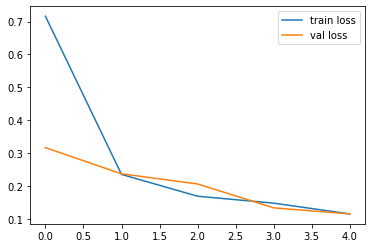

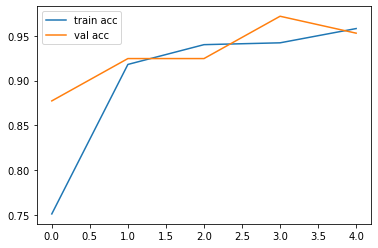

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [73]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [74]:
y_pred = model.predict(test_set)


In [75]:
y_pred

array([[1.29222928e-03, 1.46679289e-04, 9.98557985e-01, 3.03336674e-06],
       [1.01493697e-05, 2.60096509e-02, 9.95445771e-06, 9.73970234e-01],
       [2.70551885e-03, 5.25522931e-03, 9.74647045e-01, 1.73921697e-02],
       [4.56437527e-04, 1.37374565e-01, 2.01621908e-04, 8.61967385e-01],
       [8.71714115e-01, 4.33114583e-05, 1.28235474e-01, 7.07237041e-06],
       [9.99752343e-01, 1.51040455e-04, 6.86307540e-05, 2.79307224e-05],
       [3.27938906e-05, 3.19893323e-02, 9.63632658e-04, 9.67014134e-01],
       [3.49068403e-04, 6.83713481e-02, 2.24088071e-04, 9.31055486e-01],
       [2.80655874e-03, 3.26237245e-03, 9.72137332e-01, 2.17937585e-02],
       [2.28025410e-02, 1.37425850e-05, 9.77166712e-01, 1.69865380e-05],
       [7.87192039e-05, 9.94850695e-01, 2.97932202e-05, 5.04072523e-03],
       [1.56591297e-03, 1.29345983e-06, 9.98432815e-01, 1.42713121e-08],
       [4.80448408e-03, 5.90507454e-07, 9.95193243e-01, 1.66984853e-06],
       [5.09036845e-03, 2.77812040e-04, 9.82796133e